In [46]:
import pandas as pd
import numpy as np

# Cijene - svjetsko tržište

Cijene goriva na svjetskom tržištu za 2020.  su preuzete sa stranice https://2020.entsos-tyndp-scenarios.eu/fuel-commodities-and-carbon-prices/ za prirodni gas (lignit, prirodni gas i "laku" naftu, od koje se dobijaju derivati kao što je dizel). 

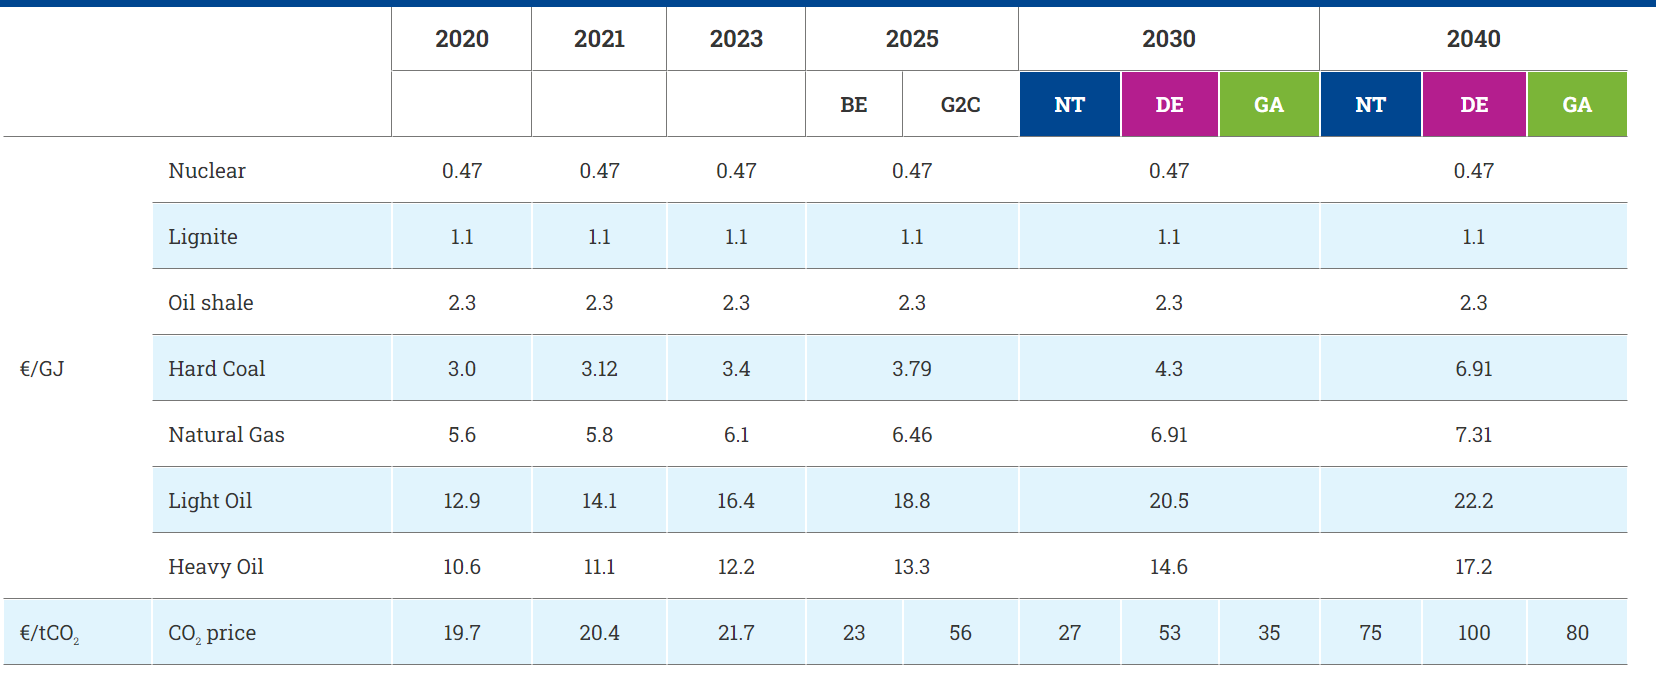

In [1]:
lignite=1.1
nat_gas=5.6#
light_oil=12.9
hard_coal=3.3
diesel=14.8 #uzeto iz jednog od modela za Srbiju za 2020.
petrol=16.2#uzeto iz jednog od modela za Srbiju za 2020.
lpg=21.43#uzeto iz jednog od modela za Srbiju za 2020.
biomass=2.66#uzeto iz jednog od modela za Srbiju za 2020.
fueloil=10.4 #uzeto iz jednog od modela za Srbiju za 2020.

Za biomasu je procijenjena cijena na svjetskom tržištu nađena i kao 6-8 EUR/GJ, međutim, domaća preduzeća nabavljaju biomasu po nižoj cijeni te je zato uzeta vrijednost 2.66 EUR/GJ. Slično je i sa mazutom kojeg jedno od domaćih preduzeća nabavlja po cijeni 0.89 KM/kg (fajl DH.xlsx)

## Mazut kao tečno gorivo 

In [8]:
cijena_mazut=0.89#eur/kg
HV_mazut=42.5#GJ/T
price_mazut_1=(0.89/(42.5/1000))/1.95583
print("Mazut",price_mazut_1,"EUR/GJ")

trosak_mazut=459978 #KM
mass=719#T
HV_mazut=42.5#GJ/T
price_mazut_2=((trosak_mazut/mass)/42.5)/1.95583
print("Mazut",price_mazut_2,"EUR/GJ")

Mazut 10.707053512109047 EUR/GJ
Mazut 7.696408964374513 EUR/GJ


Za tržišnu cijenu je uzeto 10.4 EUR/GJ tako da se različitim kategorijama na distribuciju i rafinaciju pripisao trošak od 0.3 EUR/GJ, čime se dobija rezultujući 10.71 EUR/GJ.

Eko toplane Banjaluka, izvještaj o radu https://www.banjaluka.rs.ba/wp-content/uploads/2021/08/Izvje%C5%A1taj-o-poslovanju-za-2020_godinu.pdf
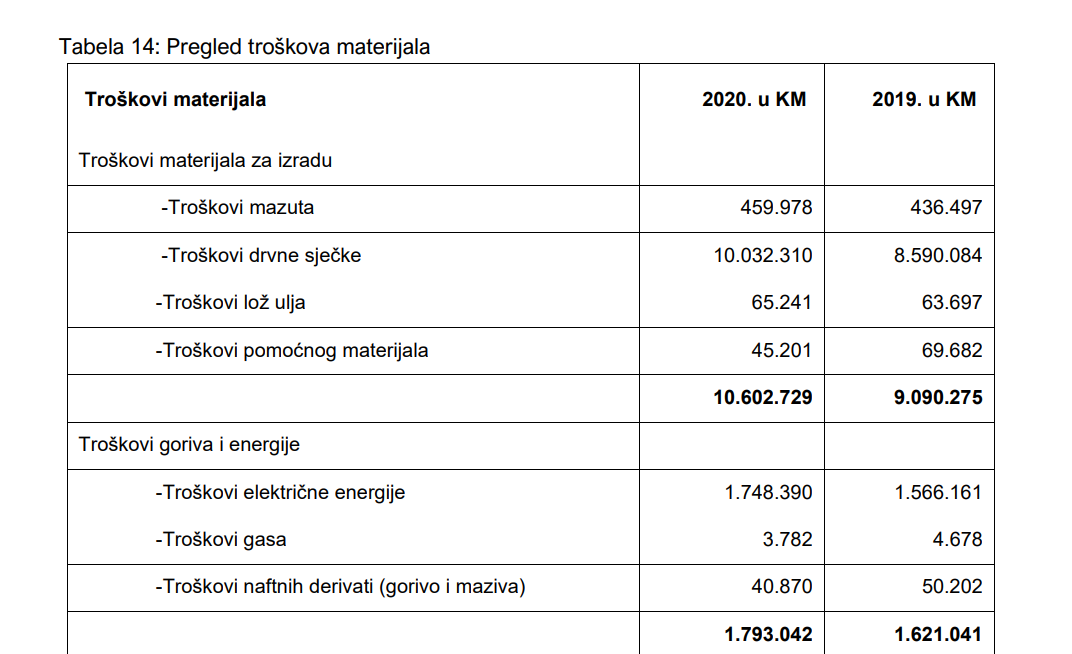
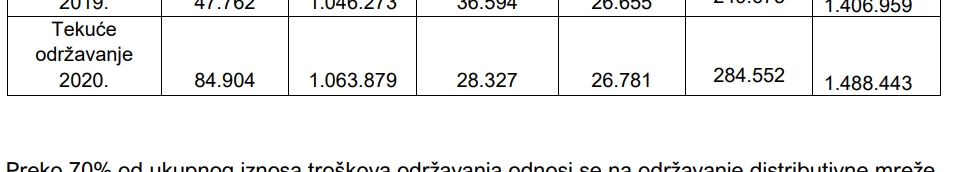
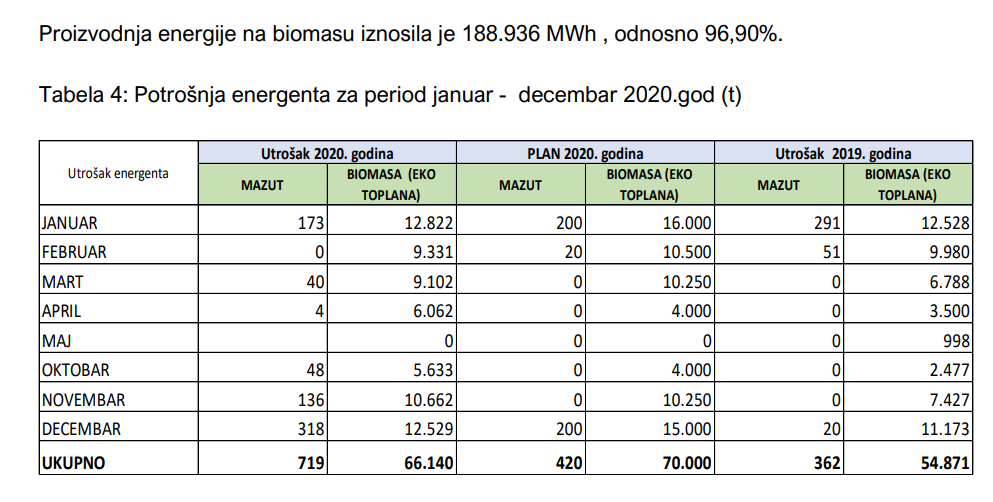

## Biomasa 

Cijena biomase na tržištu je uzeta od jednog od modela iz Srbije kao 2.66 EUR/GJ. Dalja distribucija je uzeta u obzir preko Izvještaja o radu koji je nađen za Banjaluku

In [14]:
biomass=10032310/66140 #KM/T
hv=17#GJ/T - okvirno
biomasscost=biomass/hv
print("Biomasa", biomasscost,"KM/GJ")
print("Biomasa", biomasscost/1.95583,"EUR/GJ")


Biomasa 8.922526192212597 KM/GJ
Biomasa 4.5620152018389115 EUR/GJ


In [10]:
distr_and_rafinery_DH=4.56-2.66 #to dec. CHP and DH....
print(distr_and_rafinery_DH,"EUR/GJ")

1.8999999999999995 EUR/GJ


Za jednu od ustanova u Kiseljaku je nađena nabavka od 49 500 KM za 150 t peleta, što znači da je trošak 330 KM/t. Ako se uzme toplotna moć peleta od 17GJ/t, tada je cijena:

In [12]:
pellet=49500/150
hv_pellet=17 #GJ/t
print((pellet/hv_pellet)/1.95583,"EUR/GJ")

9.925077693808946 EUR/GJ


In [14]:
distr_and_rafinery_indv=9.925077693808946-2.66
print(distr_and_rafinery_indv,"EUR/GJ") #DODAT ĆE SE NA INDIVIDUAL

7.265077693808946 EUR/GJ


## Gas

Cijene prirodnog gasa na bh. tržištu su preuzete od Agencije za statistiku BiH za I i II polugodište, te će se uzeti srednja vrijednost.
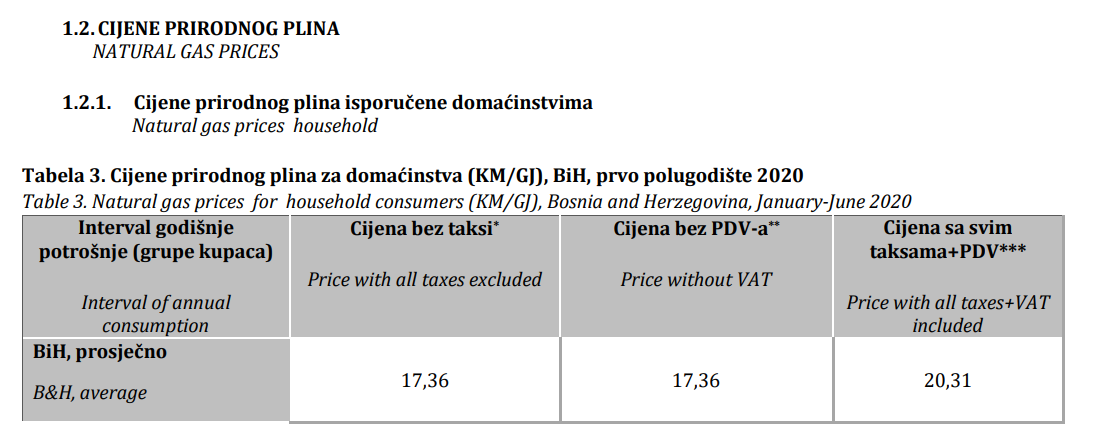


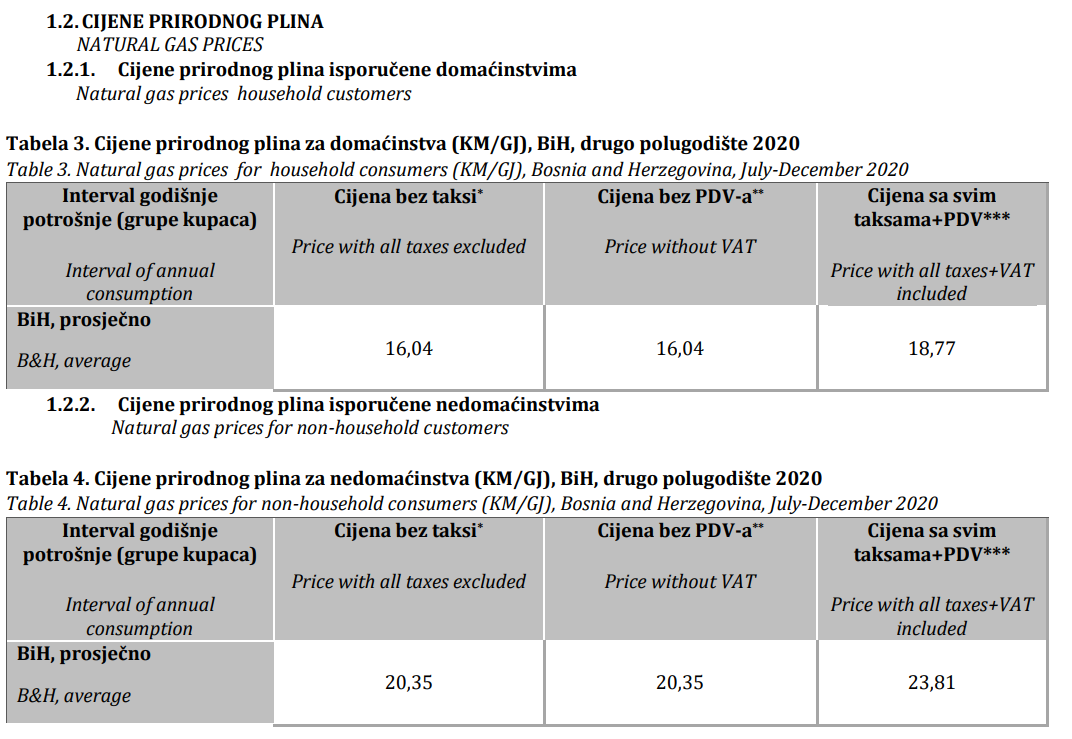

In [4]:
household_without_handling=((16.04+17.36)/2)/1.95583 #EUR/GJ  VAT
handling=household_without_handling-5.6
print("Household price, EUR/GJ",household_without_handling)
print("Handling, EUR/GJ",handling)

none_household_without_handling=20.35/1.95583 #EUR/GJ 
handling_nonh=none_household_without_handling-5.6
print("None-household price, EUR/GJ",none_household_without_handling)
print("Taxes, EUR/GJ",handling_nonh)

Household price, EUR/GJ 8.538574415976848
Handling, EUR/GJ 2.9385744159768485
None-household price, EUR/GJ 10.404789782343046
Taxes, EUR/GJ 4.804789782343047


https://world-nuclear.org/information-library/facts-and-figures/heat-values-of-various-fuels.aspx

## Transportna goriva

Prema podacima Vanjskotrgovinske komore BiH uzeta je cijena goriva u BiH u sredini godine https://www.komorabih.ba/wp-content/uploads/2020/06/cijene-goriva-2020-26.pdf. Ovdje je uzeta pretpostavka da je u cijenu uračunat PDV, te će se on izuzeti iz stvarne cijene jer softver radi na tom principu

In [2]:
#1 liter diesel = 36.0 MJ
#benzin 32 MJ/litre
#lpg 25MJ/litre 46-51 MJ/kg

In [15]:
dizel_KM_BiH=1.691 #KM/lit
print((dizel_KM_BiH/(1.17*36*0.001))/1.95583,"EUR/GJ")

20.526936635869077 EUR/GJ


In [16]:
dist_and_ref_diesel=(dizel_KM_BiH/(1.17*36*0.001))/1.95583-14.8
print(dist_and_ref_diesel,"EUR/GJ")

5.726936635869077 EUR/GJ


In [19]:
petrol_jp_KM_BIH=1.8#KM/lit
dist_and_ref_petrol=(petrol_jp_KM_BIH/(1.17*32*0.001))/1.95583-16.2
print(dist_and_ref_petrol,"EUR/GJ")

8.381340442125893 EUR/GJ


## Ugalj

Prosječna cijena uglja je uzeta kao 2 EUR/GJ. Nađen je tekst prema kojem je cijena procijenjena na 4.9 KM/GJ za BiH https://www.rtvslon.ba/vlada-fbih-saglasnost-na-povecanje-cijena-uglja-za-termoelektrane/



In [20]:
TE_price=4.9/1.95583
dist_and_ref_coal_chp=TE_price-2
print(dist_and_ref_coal_chp,"EUR/GJ")

0.5053302178614709 EUR/GJ


Nađena je odluka rudnika Banovići : https://www.rmub.ba/download/1594189178-Odluka%20o%20cijenama%20i%20uslovima%20prodaje%20uglja%20u%202020.%20godini.pdf
 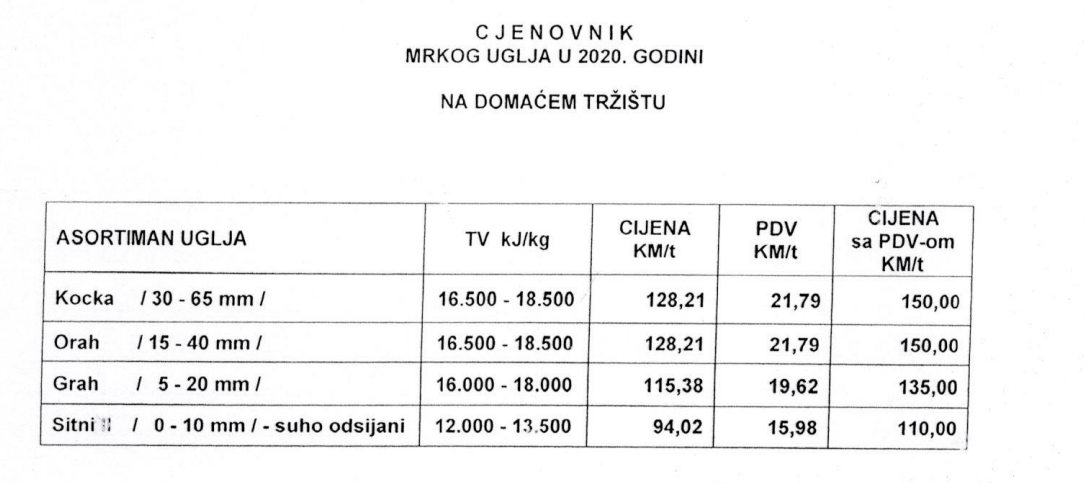   

In [23]:
ind_coal_prices=116.455#km/t
hv=16500#kj/kg
coal_indv=((ind_coal_prices/1000)/(hv/1000000))/1.95583
print(coal_indv,"EUR/GJ")

3.6086361227094317 EUR/GJ


Za industriju je pronađena Odluka JP "Željeznice FBiH za nabavku uglja: https://www.zfbh.ba/wp-content/uploads/2020/11/Odluka-o-izboru-najpovoljnijeg-ponudjaca-Ugalj-i-drva-za-2020.-godinu.pdf
<br> drveni ugalj - lignit 71t - 8875 KM
<br> mrki ugalj - 46 t - 6164,00 KM

In [1]:
price_per_tonne1= 8875/71
print("Lignit",price_per_tonne1,"KM/T")
price_per_tonne2= 6164/46
print("Lignit",price_per_tonne2,"KM/T")

Lignit 125.0 KM/T
Lignit 134.0 KM/T


In [2]:
average=129.5#KM/t
HV_cca =11884#KJ/KG
print((average/1.95583)/(11884*0.001),"EUR/GJ")

5.57154986661985 EUR/GJ


In [3]:
dist_and_ref_coal_ind=5.57-2
print(dist_and_ref_coal_ind,"EUR/GJ")

3.5700000000000003 EUR/GJ


In [24]:
dist_and_ref_coal_indv=coal_indv-2
print(dist_and_ref_coal_indv,"EUR/GJ")

1.6086361227094317 EUR/GJ


Investicioni troškovi - EP BiH:

In [9]:
VP_PODV=3.19 #mil KM/MW
VP_VL=2.5 #mil KM/MW
solar=1.3 #mil.KM/Mw 1.3-1.5

# Troškovi rada i održavanja

## DH

Za varijabilne troškove u toplanama uzet će se pojedine stavke iz sistema Toplane Sarajevo:


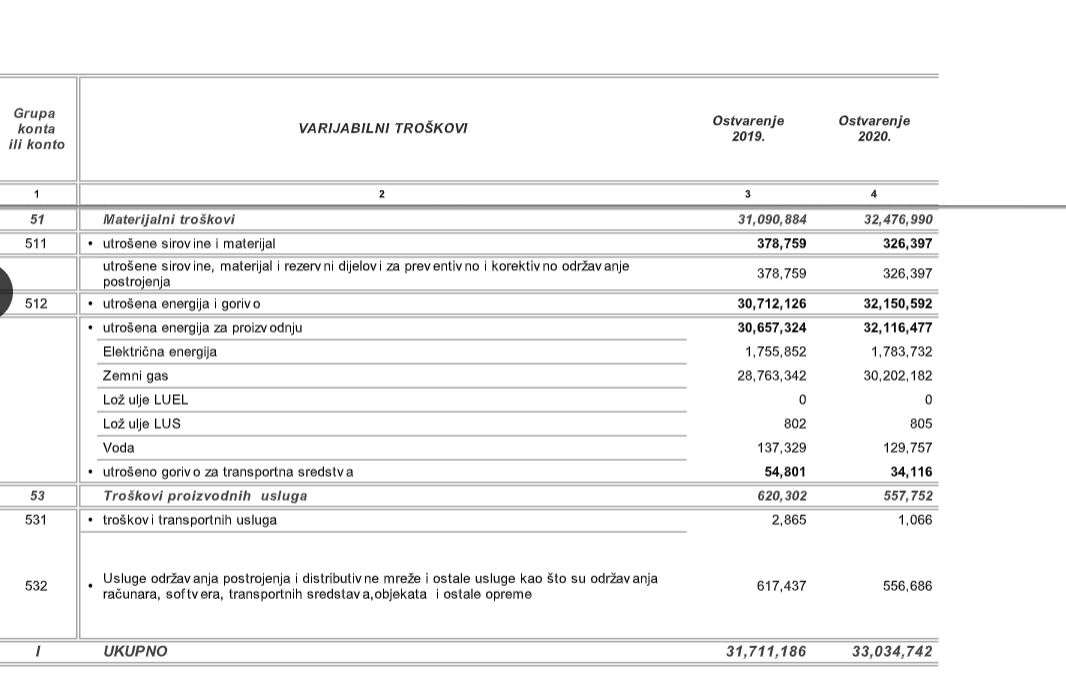

Proizvodnja toplotne energije iznosi 412047113 kWh - godišnji izvještaj

In [6]:
raws_and_maint=326397
el=1783732
water=1291757
transport=34116
grid=556686

In [7]:
VOC_dh_EUR=(raws_and_maint+el+water+transport+grid)/(1.95583*412047113*0.001)#eur/MWH
print("VOC_DH",VOC_dh_EUR)

VOC_DH 4.954358116203006


Banjaluka:

Trošak gubitka vode 4.5 KM/M3, prosječan gubitak u 7 mjeseci 831 m3/dn
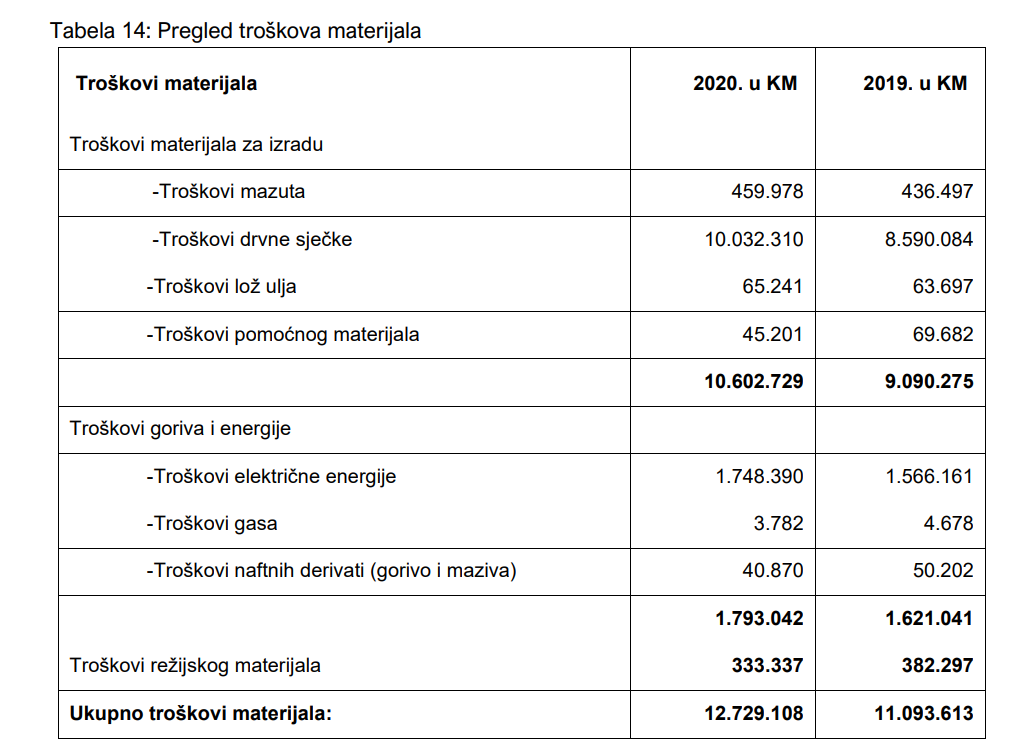


In [9]:
aux_mat=45201
el=1748390
gas=3782
fuel_lubr=40870
oth=333337
water=831*4.5*210
maint=1488443
produc=194985 #mwh


In [10]:
VOC_dh_EUR_2=(aux_mat+el+gas+fuel_lubr+oth+water+transport+maint)/(1.95583*194985)#eur/MWH
print("VOC_DH",VOC_dh_EUR_2)

VOC_DH 11.746022702024781


In [11]:
avg=(11.746022702024781+4.954358116203006)/2
print("VOC, DH",avg,"EUR/GJ")

VOC, DH 8.350190409113894 EUR/GJ


## Elektrane

Varijabilni troškovi rada postrojenja - podaci EP BiH:

In [13]:
PP=7.24#f/kWh
large_hydro=1.86#f/kWh
small_hydro=0.84#f/kWh

In [14]:
PP_EUR=(0.0724/1.95583)*1000#EUR/MWh
large_hydro_EUR=(0.0186/1.95583)*1000#EUR/MWh
small_hydro_EUR=(0.0084/1.95583)*1000#EUR/MWh
print("TE",PP_EUR,"EUR/MWh")
print("Velike HE",large_hydro_EUR,"EUR/MWh")
print("mHE",small_hydro_EUR,"EUR/MWh")

TE 37.01753219860622 EUR/MWh
Velike HE 9.510028990249664 EUR/MWh
mHE 4.2948518020482345 EUR/MWh


U slučaju TE, pretpostavlja se da je u varijabilne troškove uračunat i trošak nabavke uglja, te će se on izuzeti. Kod hidropostrojenja troškove čine troškovih održavanja, nabavke materijala za održavanje, vodoprivredne naknade i sl. 

In [15]:
price_coal=4.9 #KM/GJ
price_coal=(4.9/1.95583)/(1000/3600) #EUR/MWH
voc_pp_coal=PP_EUR-price_coal
print("VOC, TE",voc_pp_coal,"EUR/MWh")

VOC, TE 27.998343414304923 EUR/MWh


In [ ]:
#Hydropower pump - prepisano od hidro

## Postrojenja u domaćinstvima

Ako se uzme proizvoljni objekat toplotnih potreba 12 kW i pretpostavi se rad od 10 sati dnevno, 7 mjeseci u toku grijne sezone, te trošak električne struje za rad pumpe od 300 kWh/god i stepen iskorištenja 0.8, trošak električne energije je:

In [25]:
el_pump=300#kwh
el_boiler=15*10*30*7 #10 kw
print("Električna energija", el_pump+el_boiler,"kWh")
el_price=0.124 #KM/kwh
print("Trošak el.energije",el_price*(el_pump+el_boiler),"KM")

Električna energija 31800 kWh
Trošak el.energije 3943.2 KM


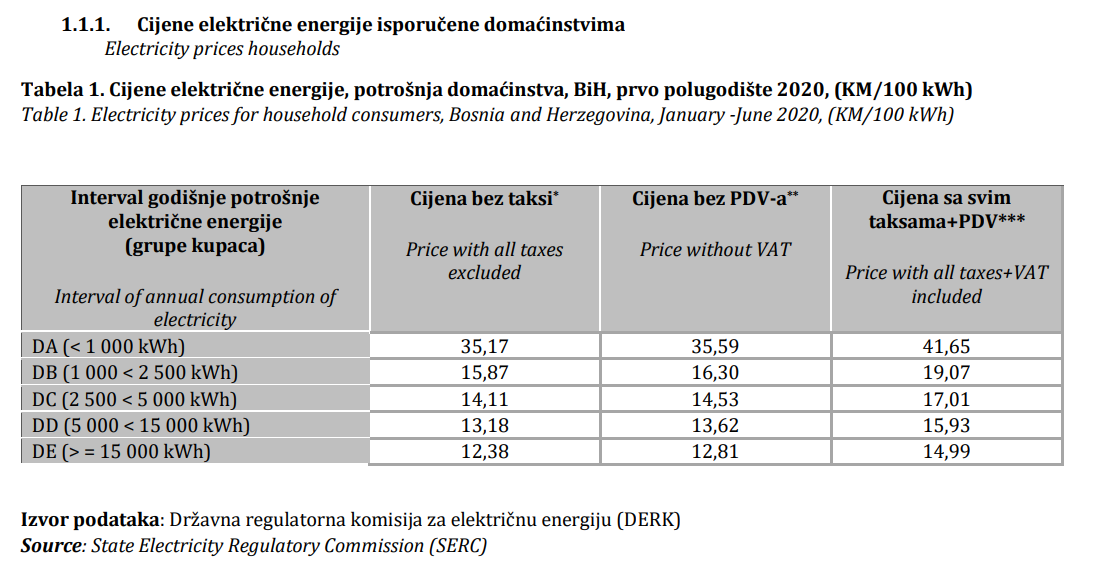
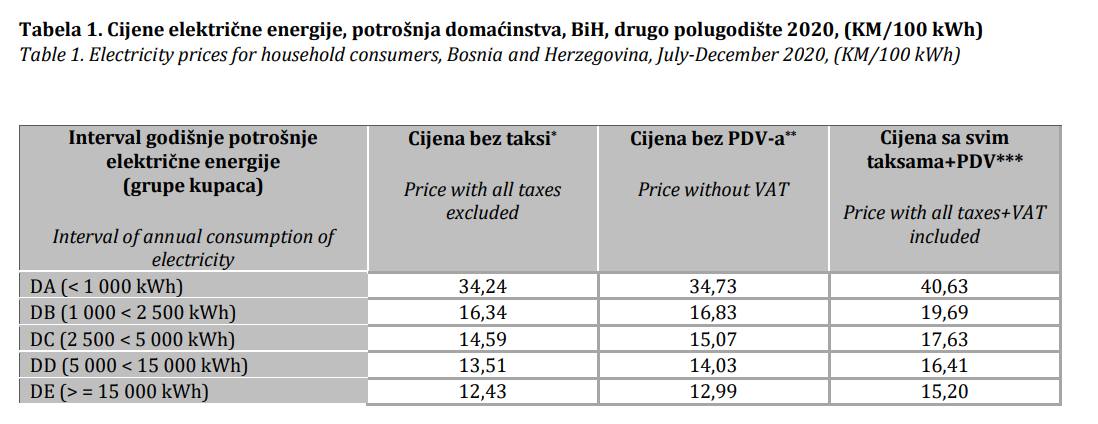

Proizvedena toplotna energija je:

In [44]:
th_boiler=12*10*30*7 #10 kwh
print("Top. energija", th_boiler,"kWh")

Top. energija 25200 kWh


Za održavanje će se pretpostaviti trošak od 100 KM/sez

In [30]:
maint=100#KM 

Po MWh toplotne energije:

In [35]:
print("VOC, ind kotao:",(maint+el_price*(el_pump+el_boiler))/(1.95583*(th_boiler/0.8)*0.001),"EUR/MWh")

VOC, ind kotao: 65.62715346198573 EUR/MWh


## Grijanje na struju

Neka su toplotne potrebe 25200 kWh, i neka je SCOP: 4

In [38]:
elec_cons=6300#kwh/god
elec_price=0.124 #KM/kwh
maint=100#KM 


In [42]:
print("VOC, ind kotao:",(maint/25200+el_price*6300)/(1.95583*25200*0.001),"EUR/MWh")

VOC, ind kotao: 15.850128830417557 EUR/MWh


Grijanje na električni bojler - stepen iskorištenja 1:

In [43]:
print("VOC, el heating:",(maint/25200+el_price*25200)/(1.95583*25200*0.001),"EUR/MWh")

VOC, el heating: 63.40027378166588 EUR/MWh


## Cijene struje na susjednim tržištima:

Cijene na tržištu Hrvatske i Srbije su pronađene preko ENTSO-e transparency platforme i CROPEX-a. Za razmatranje će se uzeti srednje satne vrijednosti na ova dva tržišta. Za Crnu Goru nisu pronađeni satni podaci.
<br>https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=false&viewType=TABLE&areaType=BZN&atch=false&dateTime.dateTime=24.03.2022+00:00|CET|DAY&biddingZone.values=CTY|10YHR-HEP------M!BZN|10YHR-HEP------M&resolution.values=PT60M&dateTime.timezone=CET_CEST&dateTime.timezone_input=CET+(UTC+1)+/+CEST+(UTC+2)
<br>https://www.cropex.hr/hr/trgovanja/unutardnevno-trziste/rezultati-unutardnevnog-trzista.html

In [48]:
skipr=list(range(0,4))


HR_prices_2019=pd.read_excel(r"FILES/ELEKT/Day-ahead Prices_HR2019.xlsx",skiprows=skipr,usecols="A:B")
HR_prices_2020=pd.read_excel(r"FILES/ELEKT/Day-ahead Prices_HR2020.xlsx",skiprows=skipr,usecols="A:B")
HR_prices_2021=pd.read_excel(r"FILES/ELEKT/Day-ahead Prices_HR2021.xlsx",skiprows=skipr,usecols="A:B")

RS_prices_2019=pd.read_excel(r"FILES/ELEKT/Day-ahead Prices_RS2019.xlsx",skiprows=skipr,usecols="A:B")
RS_prices_2020=pd.read_excel(r"FILES/ELEKT/Day-ahead Prices_RS2020.xlsx",skiprows=skipr,usecols="A:B")
RS_prices_2021=pd.read_excel(r"FILES/ELEKT/Day-ahead Prices_RS2021.xlsx",skiprows=skipr,usecols="A:B")

In [49]:
HR_prices_2019.head(3)

,MTU,BZN|HR
0,NaN,Day-ahead Price
1,NaN,[EUR/MWh]
2,00:00 - 01:00,51.00


Brisanje viška redova:

In [50]:
HR_prices_2019=HR_prices_2019[(HR_prices_2019["BZN|HR"].isna()==False)&(HR_prices_2019["MTU"].isna()==False)]
HR_prices_2020=HR_prices_2020[(HR_prices_2020["BZN|HR"].isna()==False)&(HR_prices_2020["MTU"].isna()==False)]
HR_prices_2021=HR_prices_2021[(HR_prices_2021["BZN|HR"].isna()==False)&(HR_prices_2021["MTU"].isna()==False)]


RS_prices_2019=RS_prices_2019[(RS_prices_2019["BZN|RS"].isna()==False)&(RS_prices_2019["MTU"].isna()==False)]
RS_prices_2020=RS_prices_2020[(RS_prices_2020["BZN|RS"].isna()==False)&(RS_prices_2020["MTU"].isna()==False)]
RS_prices_2021=RS_prices_2021[(RS_prices_2021["BZN|RS"].isna()==False)&(RS_prices_2021["MTU"].isna()==False)]

In [51]:
ext_market_2019=pd.concat([HR_prices_2019,RS_prices_2019],axis=1)
ext_market_2020=pd.concat([HR_prices_2020,RS_prices_2020],axis=1)
ext_market_2021=pd.concat([HR_prices_2021,RS_prices_2021],axis=1)

In [52]:
ext_market_2020.head(5)

,MTU,BZN|HR,MTU,BZN|RS
2,00:00 - 01:00,41.88,00:00 - 01:00,32.07
3,01:00 - 02:00,38.60,01:00 - 02:00,29.06
4,02:00 - 03:00,36.55,02:00 - 03:00,31.11
5,03:00 - 04:00,32.32,03:00 - 04:00,27.08
6,04:00 - 05:00,30.85,04:00 - 05:00,26.01


In [53]:
ext_market_2019["Average market price, EUR/MWh"]=ext_market_2019[["BZN|HR","BZN|RS"]].astype(float).mean(axis=1)
ext_market_2020["Average market price, EUR/MWh"]=ext_market_2020[["BZN|HR","BZN|RS"]].astype(float).mean(axis=1)
ext_market_2021["Average market price, EUR/MWh"]=ext_market_2021[["BZN|HR","BZN|RS"]].astype(float).mean(axis=1)

In [55]:
ext_market_2019["Average market price, EUR/MWh"].fillna(method="bfill",inplace=True)
ext_market_2020["Average market price, EUR/MWh"].fillna(method="bfill",inplace=True)
ext_market_2021["Average market price, EUR/MWh"].fillna(method="bfill",inplace=True)

In [56]:
zeros = pd.DataFrame(0, index=np.arange(24),columns=ext_market_2019.columns)
ext_market_2019= pd.concat([ext_market_2019, zeros])
ext_market_2021= pd.concat([ext_market_2021, zeros])
print("8784 vrijednosti, zadnjih 24 su nule")

8784 vrijednosti, zadnjih 24 su nule


In [57]:
ext_market_2019.shape

(8784, 5)

In [58]:
pd.to_numeric(ext_market_2019["Average market price, EUR/MWh"]).to_csv(r'EnergyPLAN files\Electricity\Hourly\avex_market_price_2019.txt', index=False,header=0,decimal=",",sep=" ")
pd.to_numeric(ext_market_2020["Average market price, EUR/MWh"]).to_csv(r'EnergyPLAN files\Electricity\Hourly\avex_market_price_2020.txt', index=False,header=0,decimal=",",sep=" ")
pd.to_numeric(ext_market_2021["Average market price, EUR/MWh"]).to_csv(r'EnergyPLAN files\Electricity\Hourly\avex_market_price_2021.txt', index=False,header=0,decimal=",",sep=" ")


In [59]:
ext_market_2020["Average market price, EUR/MWh"].min()

-9.71

In [60]:
ext_market_2020["Average market price, EUR/MWh"].max()

168.8

In [61]:
ext_market_2020["Average market price, EUR/MWh"].mean()

38.519375569216805

Elastičnost cijena je promatrana u External_market_prices.ipynb ali je nepoznat pojam u softveru "Basis price level for elasticity", te ovaj segment na kraju nije promatran.